In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats

# **Question 1**

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving master.csv to master.csv


In [4]:
df=pd.read_csv('master.csv')
df.sort_values("suicides_no", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

data=df
datagrouped= data.groupby('country').mean() #to find the mean of the suicides number to find the top 6 countries
datasorted=datagrouped.sort_values(by='suicides_no', ascending=False)
datasorted.head(15)  #to determine the top 6 

year  suicides_no  ...  HDI for year  gdp_per_capita ($)
country                                       ...                                  
Russian Federation  2002.000000  3733.771605  ...           NaN         6518.814815
United States       2000.000000  2779.604839  ...      0.891600        39269.612903
Japan               2000.000000  2169.091398  ...      0.861300        36397.548387
Ukraine             2000.571429   952.232143  ...      0.713500         1867.535714
Germany             2002.500000   933.532051  ...      0.881778        35164.230769
France              1999.500000   914.241667  ...      0.848600        31481.466667
Republic of Korea   2000.000000   703.575269  ...           NaN        14801.258065
Brazil              2000.000000   609.174731  ...      0.694900         6091.483871
Poland              2002.916667   482.979167  ...      0.803000         8146.458333
Sri Lanka           1997.545455   421.522727  ...      0.638000          904.272727
United Kingdom      2000.000000   367.755376  ...      0.863500        31908.354839
Italy               2000.000000   355.000000  ...      0.834800        26602.580645
Thailand            2001.520958   331.266467  ...      0.666500         3572.161677
Kazakhstan          2002.500000   325.467949  ...      0.740889         5329.115385
Canada              1999.000000   309.083333  ...      0.881111        30887.482759

[15 rows x 6 columns]

The countries chosen by me are United States, Japan, Republic of Korea,Brazil, United Kingdom,Italy.
Chosen these such that the average of each year is the same implying that the years are common to all 6.

# **(a)**

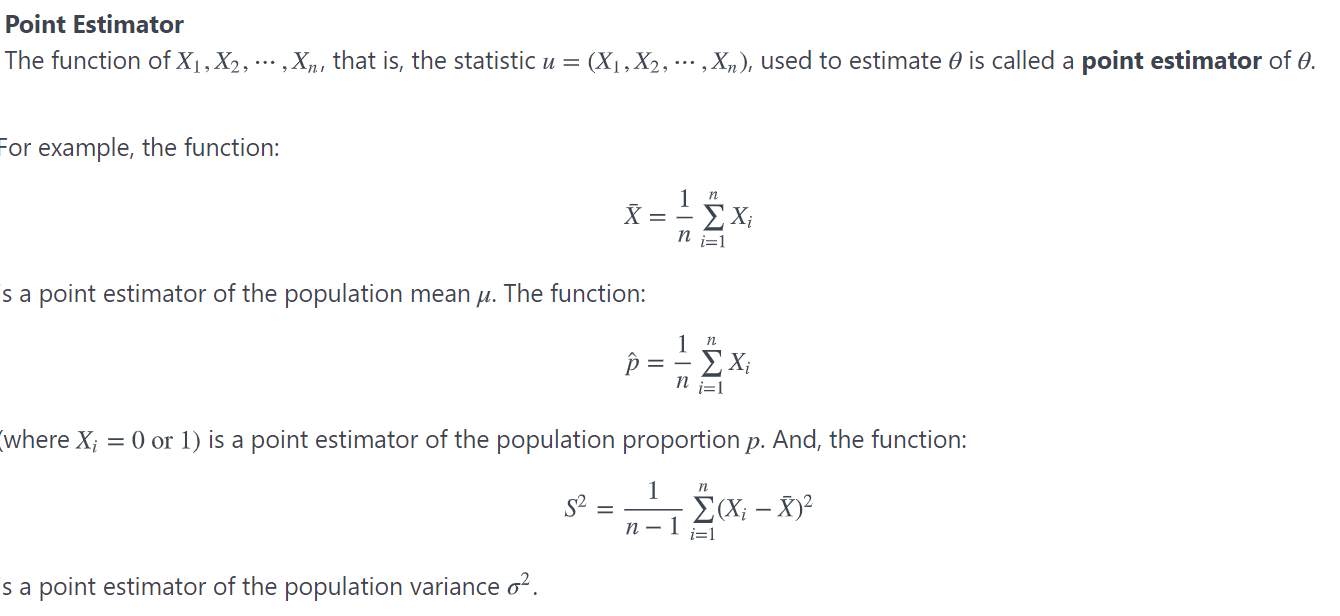

In [ ]:
import warnings
warnings.filterwarnings('ignore')
cnt=['United States','Brazil','Republic of Korea','Japan','United Kingdom','Italy']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  sum=0.0
  df3=df2.groupby(['year'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  
  x=df3['total_suicides/100k_mean'].mean()
  
  df3['Xi-mean_squared']=(df3['total_suicides/100k_mean']-x)*(df3['total_suicides/100k_mean']-x)
  var=df3['Xi-mean_squared'].mean()
  print("\nThe data for",countri,"is below and the sum of error squared is in the last column of the following:\n",df3)
  
  print("\n The average(mean) suicide rate over these given years is ",x,"\n")
  print("\n The variance of suicide rate over these given years is ",var,"\n")


The data for United States is below and the sum of error squared is in the last column of the following:
     year  total_suicides  total_pop  total_suicides/100k_mean  Xi-mean_squared
0   1985           29446  220723000                 13.340703         0.255429
1   1986           30892  222953000                 13.855835         1.041486
2   1987           30783  225148000                 13.672340         0.700631
3   1988           30388  227353000                 13.365999         0.281638
4   1989           30218  229487000                 13.167630         0.110442
5   1990           30895  229952200                 13.435401         0.360118
6   1991           30790  232955000                 13.217145         0.145803
7   1992           30471  235565600                 12.935250         0.009989
8   1993           31084  238092300                 13.055441         0.048461
9   1994           31123  240614100                 12.934820         0.009904
10  1995           31272

# **(b)**

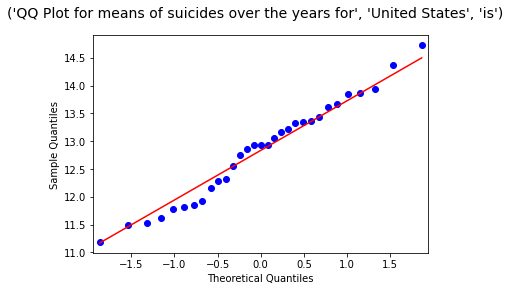

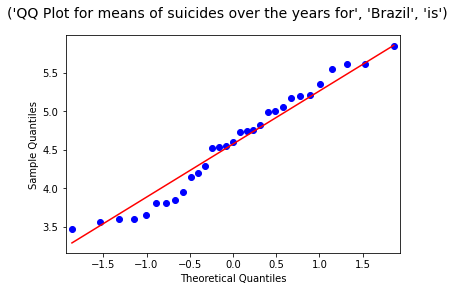

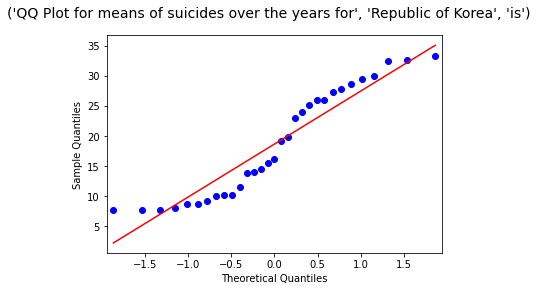

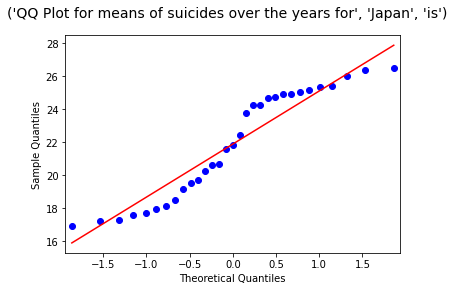

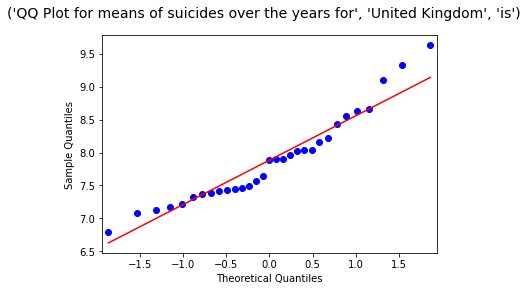

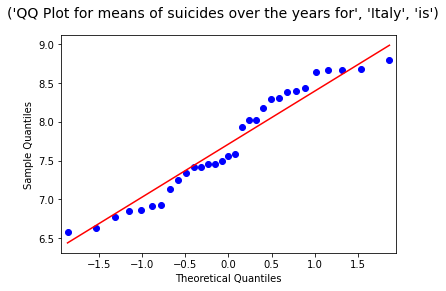

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
cnt=['United States','Brazil','Republic of Korea','Japan','United Kingdom','Italy']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  
  df3=df2.groupby(['year'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  fig= sm.qqplot(df3['total_suicides/100k_mean'],line='s')
  t="QQ Plot for means of suicides over the years for",countri,"is"
  fig.suptitle (t,fontsize=14)
  plt.show()

  

If the scatter plot is close to or on the line, then it is gaussian distributes. We see that none os these distributions lie exactly on the line so none are exactly gaussian distributed but all of them lie very close to it so that are almost, or they have gaussian distribution character in them.

# **(c)**

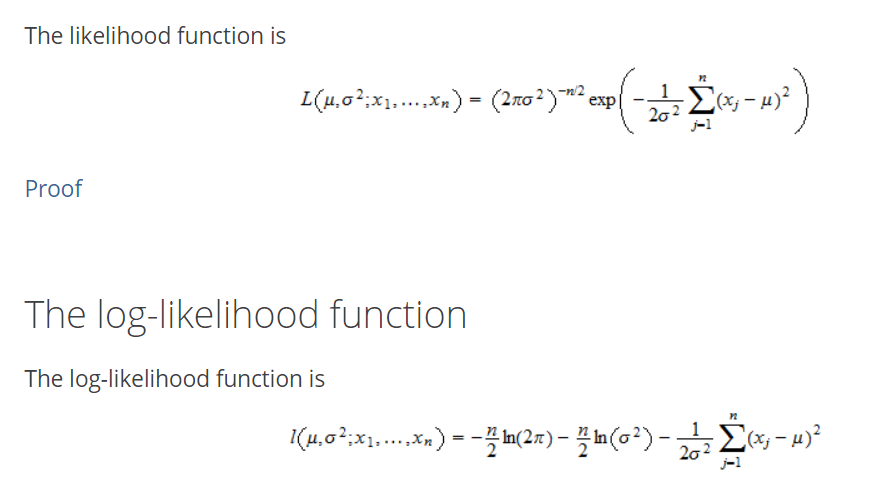

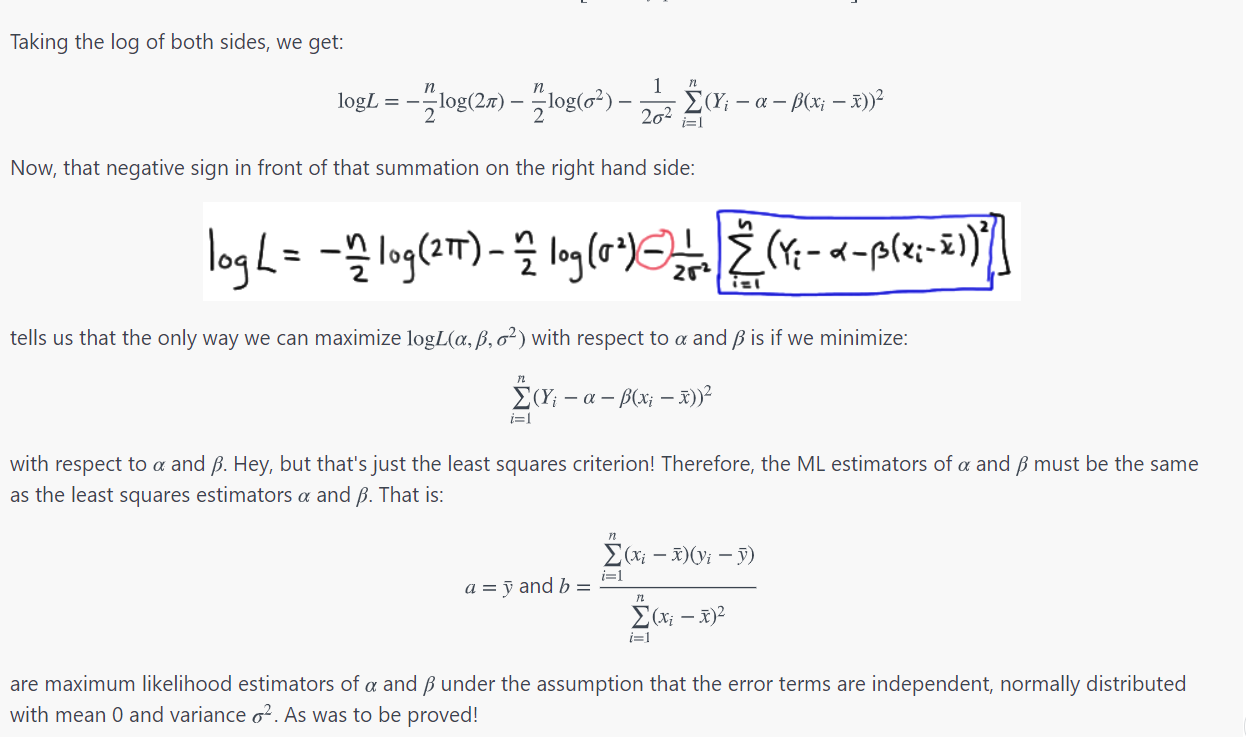

In [ ]:
import math
import statsmodels.api as sm
cnt=['United States','Brazil','Republic of Korea','Japan','United Kingdom','Italy']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  n=31
  sum=0
  df3=df2.groupby(['year'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  list_x=df3['total_suicides/100k_mean']
  mu =df3['total_suicides/100k_mean'].mean()
  df3['Xi-mean_squared']=(df3['total_suicides/100k_mean']-mu)*(df3['total_suicides/100k_mean']-mu)
  sum = df3['Xi-mean_squared'].sum()
  sigma =math.sqrt(df3['Xi-mean_squared'].mean())
  
  logL = -sum/(2*sigma*sigma) - n*np.log(2*math.pi)/2 -n*np.log(sigma)
  print(countri,"\n",logL)
  



United States 
 -40.478162777483135
Brazil 
 -32.4440488499935
Republic of Korea 
 -111.46391484946415
Japan 
 -80.21445793890175
United Kingdom 
 -31.820965606886766
Italy 
 -32.14058949056135


The higher the log likelihood value, the better is the model, hence, the more normal is the distribution.So, the best value we have is for the UK with a LL of -31.8 and the worst is Republic of Korea with a LL of -111.46. So, from the QQ Plot, we can see that these coincide with the values obtained too as UK shows the least deviation from the red line and Republic of Korea the most.

# **(d)**

In [ ]:
from scipy import stats 
import math
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
cnt=['United States','Brazil','Republic of Korea','Japan','United Kingdom','Italy']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  sum=0.0
  df3=df2.groupby(['year'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  
  x=df3['total_suicides/100k_mean'].mean()
  
  df3['Xi-mean_squared']=(df3['total_suicides/100k_mean']-x)*(df3['total_suicides/100k_mean']-x)
  var=df3['Xi-mean_squared'].mean()
  #print("\nThe data for",countri,"is below :\n",df3)
  n=31
  con_coef=.95
  alpha= 1-con_coef
  x_bar=x
  sigma=math.sqrt(var)
  z_critical= stats.norm.ppf(q= 0.975)
  z_interval= stats.norm.interval(alpha=con_coef)
  z_interval
  standard_error= sigma/ math.sqrt(n)
  CI_lower= x_bar-z_critical*standard_error
  CI_upper= x_bar+z_critical*standard_error
  print('\n For',countri,'the 95% Confidence interval for suicides/100k pop across the years  is:')
  print(CI_lower,"to", CI_upper,"\n")




 For United States the 95% Confidence interval for suicides/100k pop across the years  is:
12.520956329401095 to 13.1496496733361 


 For Brazil the 95% Confidence interval for suicides/100k pop across the years  is:
4.328305220686942 to 4.81346517676086 


 For Republic of Korea the 95% Confidence interval for suicides/100k pop across the years  is:
15.534468489190406 to 21.741925415409046 


 For Japan the 95% Confidence interval for suicides/100k pop across the years  is:
20.753556469670187 to 23.01884990433217 


 For United Kingdom the 95% Confidence interval for suicides/100k pop across the years  is:
7.646329766739855 to 8.121835616120444 


 For Italy the 95% Confidence interval for suicides/100k pop across the years  is:
7.472443492816579 to 7.95287738195672 



# **(e)**

The 2 countries with closest means are UK and Italy.

In [ ]:
from scipy import stats
cnt=['United Kingdom']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  df3=df2.groupby(['year'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  a=df3['total_suicides/100k_mean']

cnt=['Italy']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  df3=df2.groupby(['year'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  b=df3['total_suicides/100k_mean']

  

print("The results for welsh t test are:")
print(scipy.stats.ttest_ind(a,b, equal_var = False))
print("The results for wilcoxon test are:")
scipy.stats.wilcoxon(a-b)

The results for welsh t test are:
Ttest_indResult(statistic=0.9779210170187139, pvalue=0.3320404268870717)
The results for wilcoxon test are:


WilcoxonResult(statistic=149.0, pvalue=0.05237264648396437)

Null hypothesis (H0): The mean of sample 1 is equal to the mean of sample 2

Alternative hypothesis (HA): u1 ≠ u2,implies the mean of sample 1 is not equal to the mean of sample 2

The assumptions we have taken are:

The distribution of the two groups should follow the normal distribution

From the Wilcoxon test result we arrive at:

if p-value is less than 0.05, we can reject the null hypothesis, since it is greater than 0.05, we accept the null hypothesis.

From the Welsh's T-test:

if p-value is less than 0.05, we can reject the null hypothesis, since it is greater than 0.05, we accept the null hypothesis.

# **(f)**

In [ ]:
t, p = stats.ttest_rel(a, b)
t, p

(1.7088050356531415, 0.09781493092406715)

If the p-value is smaller than the threshold- we have taken it as 0.05, then we reject the null hypothesis of equal averages. Soince it is greater, we accept the null hypothesis.

# **(g)**

Have not considered Republic of Korea as the HDI for this country is not defined, so it is senseless to derive any conclusion for this. So have considered the 5 countries.

Also, have first plotted GDP and HDI separately to get an understanding of the data and whether it is linearly varying or not.



 The graphs of HDI and GDP (separately) for United States


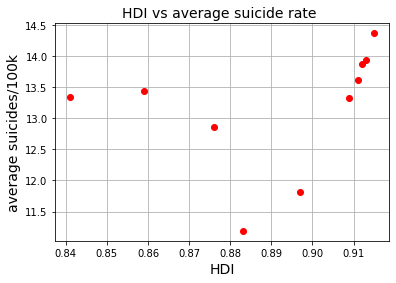

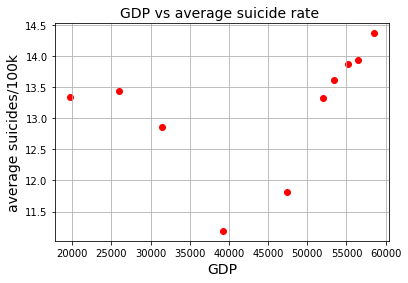



 The graphs of HDI and GDP (separately) for Brazil


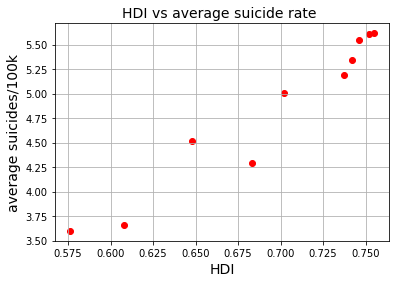

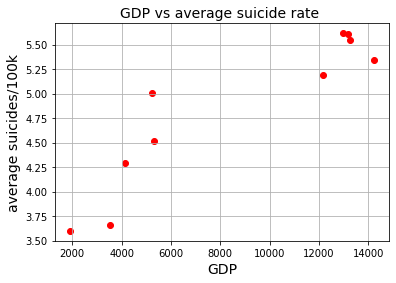



 The graphs of HDI and GDP (separately) for Japan


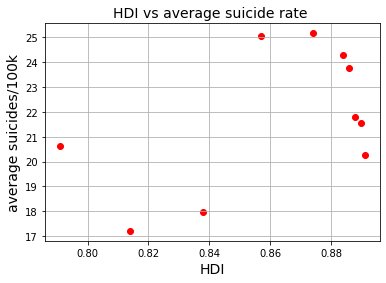

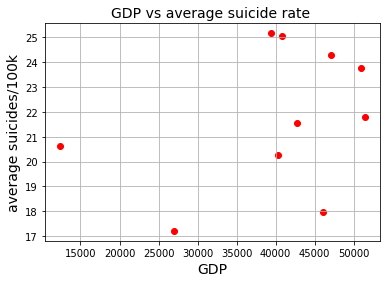



 The graphs of HDI and GDP (separately) for United Kingdom


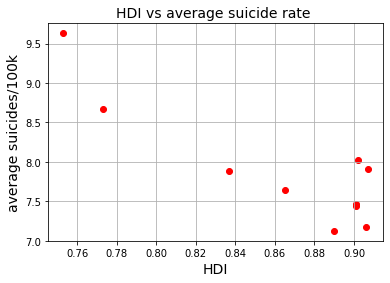

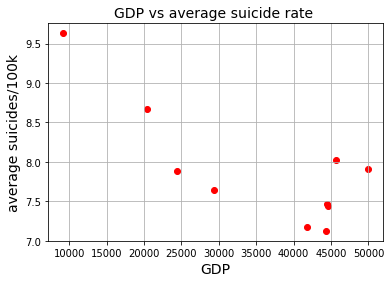



 The graphs of HDI and GDP (separately) for Italy


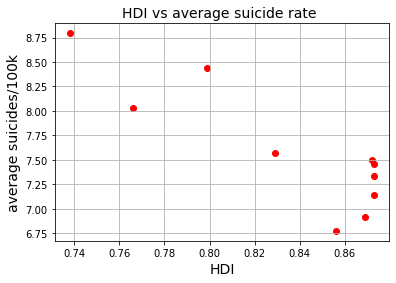

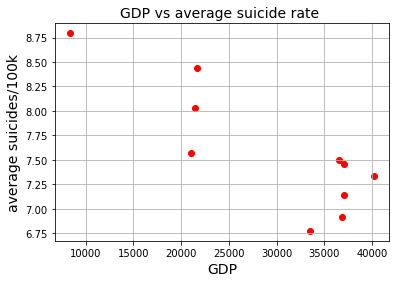

In [10]:
cnt=['United States','Brazil','Japan','United Kingdom','Italy']
for countri in cnt:
  df2=df.loc[df['country']==countri]
  sum=0.0
  df3=df2.groupby(['year','HDI for year','gdp_per_capita ($)'])['suicides_no','population'].sum()
  df3=df3.reset_index()
  df3.columns=['year','HDI','GDP','total_suicides','total_pop']
  df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']
  
  print('\n\n The graphs of HDI and GDP (separately) for',countri)
  plt.scatter(df3['HDI'], df3['total_suicides/100k_mean'], color='red')
  plt.title('HDI vs average suicide rate ', fontsize=14)
  plt.xlabel('HDI', fontsize=14)
  plt.ylabel('average suicides/100k', fontsize=14)
  plt.grid(True)
  plt.show()
  plt.scatter(df3['GDP'], df3['total_suicides/100k_mean'], color='red')
  plt.title('GDP vs average suicide rate ', fontsize=14)
  plt.xlabel('GDP', fontsize=14)
  plt.ylabel('average suicides/100k', fontsize=14)
  plt.grid(True)
  plt.show()

  
  

In [8]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
import statsmodels.api as sm

df2=df.loc[df['country']=='Brazil']
df3=df2.groupby(['year','HDI for year','gdp_per_capita ($)'])['suicides_no','population'].sum()
df3=df3.reset_index()
df3.columns=['year','HDI','GDP','total_suicides','total_pop']
df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']

X = df3[['GDP','HDI']] # here we have 2 variables for multiple regression. 
Y = df3['total_suicides/100k_mean']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('For Brazil:')
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
import statsmodels.api as sm

df2=df.loc[df['country']=='United Kingdom']
df3=df2.groupby(['year','HDI for year','gdp_per_capita ($)'])['suicides_no','population'].sum()
df3=df3.reset_index()
df3.columns=['year','HDI','GDP','total_suicides','total_pop']
df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']

X = df3[['GDP','HDI']] # here we have 2 variables for multiple regression. 
Y = df3['total_suicides/100k_mean']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('For UK:')
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
import statsmodels.api as sm

df2=df.loc[df['country']=='Italy']
df3=df2.groupby(['year','HDI for year','gdp_per_capita ($)'])['suicides_no','population'].sum()
df3=df3.reset_index()
df3.columns=['year','HDI','GDP','total_suicides','total_pop']
df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']

X = df3[['GDP','HDI']] # here we have 2 variables for multiple regression. 
Y = df3['total_suicides/100k_mean']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\n\nFor Italy:')
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
import statsmodels.api as sm

df2=df.loc[df['country']=='Japan']
df3=df2.groupby(['year','HDI for year','gdp_per_capita ($)'])['suicides_no','population'].sum()
df3=df3.reset_index()
df3.columns=['year','HDI','GDP','total_suicides','total_pop']
df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']

X = df3[['GDP','HDI']] # here we have 2 variables for multiple regression. 
Y = df3['total_suicides/100k_mean']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\n\nFor Japan:')
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

For Brazil:
Intercept: 
 -2.007691206979281
Coefficients: 
 [3.22568263e-05 9.45095281e+00]
                               OLS Regression Results                               
Dep. Variable:     total_suicides/100k_mean   R-squared:                       0.948
Model:                                  OLS   Adj. R-squared:                  0.933
Method:                       Least Squares   F-statistic:                     63.39
Date:                      Sat, 17 Oct 2020   Prob (F-statistic):           3.28e-05
Time:                              17:27:10   Log-Likelihood:                 3.5928
No. Observations:                        10   AIC:                            -1.186
Df Residuals:                             7   BIC:                           -0.2778
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|    

In [6]:
import warnings
warnings.filterwarnings('ignore')

print('For USA:')
from sklearn import linear_model
import statsmodels.api as sm

df2=df.loc[df['country']=='United States']
df3=df2.groupby(['year','HDI for year','gdp_per_capita ($)'])['suicides_no','population'].sum()
df3=df3.reset_index()
df3.columns=['year','HDI','GDP','total_suicides','total_pop']
df3['total_suicides/100k_mean']=(df3['total_suicides']*100000)/df3['total_pop']

X = df3[['GDP','HDI']] # here we have 2 variables for multiple regression. 
Y = df3['total_suicides/100k_mean']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

For USA:
Intercept: 
 58.226363245980686
Coefficients: 
 [ 1.27529396e-04 -5.68165684e+01]
                               OLS Regression Results                               
Dep. Variable:     total_suicides/100k_mean   R-squared:                       0.148
Model:                                  OLS   Adj. R-squared:                 -0.096
Method:                       Least Squares   F-statistic:                    0.6059
Date:                      Sat, 17 Oct 2020   Prob (F-statistic):              0.572
Time:                              17:26:23   Log-Likelihood:                -12.667
No. Observations:                        10   AIC:                             31.33
Df Residuals:                             7   BIC:                             32.24
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|     